In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [12]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,...,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,NaN,2360.0,NaN,0,0,0,0,0,2,0


In [13]:
df.shape

(3803, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [15]:
df.duplicated().sum()

126

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,1342.0,NaN,NaN,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,...,583.0,565.0,483.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9,9,3+,...,NaN,165.0,164.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,NaN,2360.0,NaN,0,0,0,0,0,2,0


## Property Type

'Observation :'

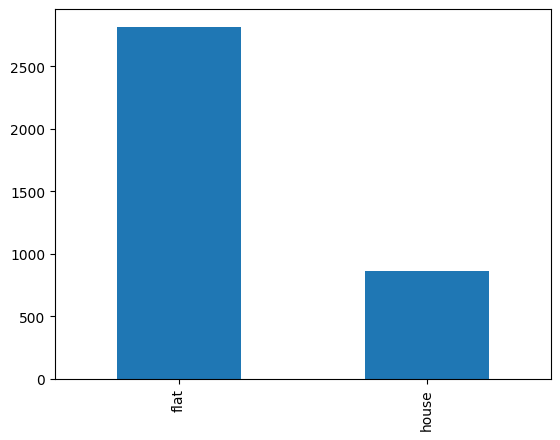

In [19]:
df['property_type'].value_counts().plot(kind = 'bar')

"""Observation :
> Majority are flats (75 %) and less number of houses (~25%)
> """

### Society

In [20]:
df['society'].value_counts().shape

(676,)

In [21]:
df['society'].value_counts()

independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
ramson kshitij sec-95 gurugram            1
city heights                              1
ashok vihar phase 2                       1
landmark the residency                    1
signature signum 95a                      1
Name: society, Length: 676, dtype: int64

In [22]:
df[df['society'] != 'independent']['society'].value_counts(normalize = True).cumsum().head(75)

tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
ats kocoon                              0.490282
umang monsoon breeze                    0.494357
the close north                         0.498433
unitech uniworld resorts                0.502194
ireo the corridors                      0.505956
Name: society, Length: 75, dtype: float64

In [23]:
society_counts = df['society'].value_counts()

# Frequency distribution for socities
frequency_bins = {
    "Very High (>100)" : (society_counts > 100).sum(),
    "High (50 -100)" : ((society_counts >=50) & (society_counts <= 100)).sum(),
    "Average (10-49)" : ((society_counts >=10) & (society_counts <= 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts <= 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50 -100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 279,
 'Very Low (1)': 308}

<Axes: >

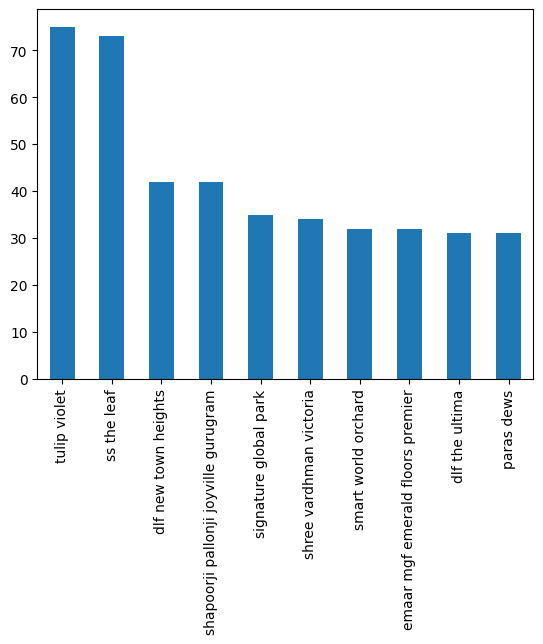

In [25]:
# Plotting the top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [26]:
df['society'].isnull().sum()

1

In [29]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1626,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,2,0


In [30]:
## Observations
# 1. Around 13% properties comes under independent tag
# 2. In total there aere 675 societies.
# 3. The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
"""Very High (>100): Only 1 society has more than 100 listings.
High (50-100): 2 societies have between 50 to 100 listings.
Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
Low (2-9): 273 societies have between 2 to 9 listings.
Very Low (1): A significant number, 308 societies, have only 1 listing."""
# 4. 1 missing value

'Very High (>100): Only 1 society has more than 100 listings.\nHigh (50-100): 2 societies have between 50 to 100 listings.\nAverage (10-49): 92 societies fall in this range with 10 to 49 listings each.\nLow (2-9): 273 societies have between 2 to 9 listings.\nVery Low (1): A significant number, 308 societies, have only 1 listing.'

## sector

In [31]:
df['sector'].value_counts().shape  # unique sector

(113,)

<Axes: >

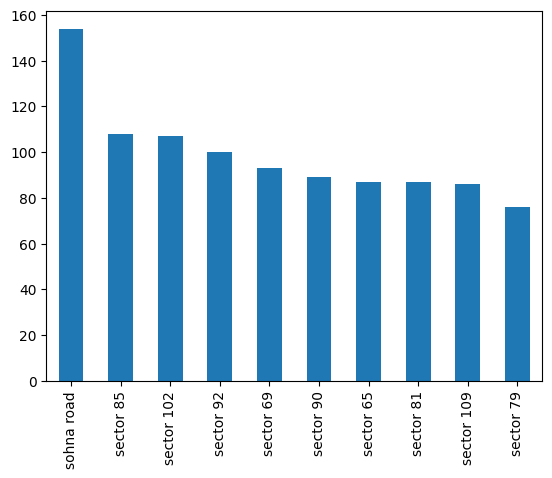

In [32]:
# Plotting the top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [33]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

In [34]:
# Observations
"""Total 113 unique sectors in the dataset
    Frequency distribution of sectors:
        Very High (>100): 3 sectors have more than 100 listings.
        High (50-100): 25 sectors have between 50 to 100 listings.
        Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
        Low (2-9): 21 sectors have between 2 to 9 listings.
        Very Low (1): Interestingly, there are no sectors with only 1 listing."""

'Total 113 unique sectors in the dataset\n    Frequency distribution of sectors:\n        Very High (>100): 3 sectors have more than 100 listings.\n        High (50-100): 25 sectors have between 50 to 100 listings.\n        Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.\n        Low (2-9): 21 sectors have between 2 to 9 listings.\n        Very Low (1): Interestingly, there are no sectors with only 1 listing.'

## Price

In [35]:
df['price'].isnull().sum()

17

In [36]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

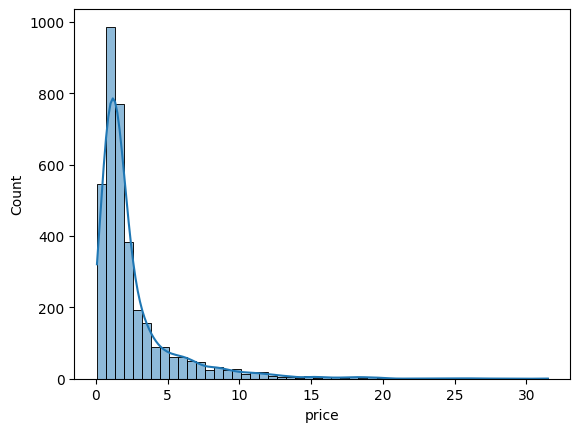

In [37]:
sns.histplot(df['price'], kde=True, bins=50)

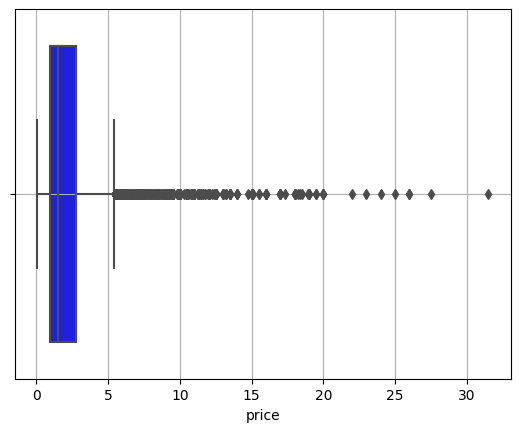

In [41]:
sns.boxplot(x=df['price'], color = 'blue')
plt.grid()

In [42]:
## Descriptive Statistics:
"""
    Count: There are 3,660 non-missing price entries.
    Mean Price: The average price is approximately 2.53 crores.
    Median Price: The median (or 50th percentile) price is 1.52 crores.
    Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
"""
##Visualizations:
"""
    Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
    Missing Values: There are 17 missing values in the price column.
"""

'\n    Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.\n    Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.\n    Missing Values: There are 17 missing values in the price column.\n'

In [43]:
# Skewness and Kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 3.279170
Kurtosis: 14.933373


In [ ]:
# Observations